In [17]:
!pip install tensorflow
!pip install datasets
!pip install transformers

In [18]:
!pip install tensorflow-addons

In [34]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

print(tf.__version__)

2.15.0


In [35]:
import numpy as np
import tensorflow_datasets as tfds

In [37]:
def preprocess(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label


In [38]:
def augment(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1) # Adjust brightness by up to 10%
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1) # Adjust contrast between 90% and 110%
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


(ds_train, ds_validation), ds_info = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True,
)

train_ds = ds_train.map(augment).batch(32).prefetch(tf.data.AUTOTUNE)

val_ds = ds_validation.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [39]:
img_width = 96
img_height= 96

**Building the CNN Model**

In [40]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape =(img_width, img_height,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(256, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 47, 47, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 22, 22, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 10, 10, 64)       

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(train_ds,
                    epochs= 15,
                    validation_data = val_ds,)

Epoch 1/15
689/689 [==============================] - 33s 45ms/step - loss: 0.2860 - accuracy: 0.8787 - val_loss: 0.1753 - val_accuracy: 0.9465
Epoch 2/15
689/689 [==============================] - 25s 37ms/step - loss: 0.1524 - accuracy: 0.9539 - val_loss: 0.1497 - val_accuracy: 0.9530
Epoch 3/15
689/689 [==============================] - 25s 36ms/step - loss: 0.1445 - accuracy: 0.9548 - val_loss: 0.1460 - val_accuracy: 0.9548
Epoch 4/15
689/689 [==============================] - 25s 36ms/step - loss: 0.1386 - accuracy: 0.9560 - val_loss: 0.1385 - val_accuracy: 0.9561
Epoch 5/15
689/689 [==============================] - 22s 32ms/step - loss: 0.1349 - accuracy: 0.9575 - val_loss: 0.1486 - val_accuracy: 0.9523
Epoch 6/15
689/689 [==============================] - 23s 33ms/step - loss: 0.1305 - accuracy: 0.9588 - val_loss: 0.1320 - val_accuracy: 0.9572
Epoch 7/15
689/689 [==============================] - 25s 36ms/step - loss: 0.1279 - accuracy: 0.9583 - val_loss: 0.1307 - val_accuracy:

In [44]:
history.history

{'loss': [0.28595882654190063,
  0.1523718237876892,
  0.1444532573223114,
  0.1386352926492691,
  0.13491971790790558,
  0.13049618899822235,
  0.12792053818702698,
  0.12381132692098618,
  0.12044075131416321,
  0.11869480460882187,
  0.11310979723930359,
  0.11285363137722015,
  0.11272663623094559,
  0.11024333536624908,
  0.10606510192155838],
 'accuracy': [0.8787081837654114,
  0.9539145231246948,
  0.954776406288147,
  0.9560011029243469,
  0.9574525952339172,
  0.9587680101394653,
  0.9583144187927246,
  0.9583144187927246,
  0.9603556394577026,
  0.9609906673431396,
  0.9622607231140137,
  0.9622607231140137,
  0.9629864692687988,
  0.9631679058074951,
  0.9643019437789917],
 'val_loss': [0.1753454953432083,
  0.1496851146221161,
  0.14596541225910187,
  0.13847509026527405,
  0.14863821864128113,
  0.132043719291687,
  0.1307251900434494,
  0.1293151080608368,
  0.12948912382125854,
  0.1282653659582138,
  0.12461745738983154,
  0.12158531695604324,
  0.124617800116539,
  0.1

In [49]:
model.save('model_2.keras')

In [50]:
def plot_learningCurve(history, epoch):
  epoch_range= range(1, epoch+1)
  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

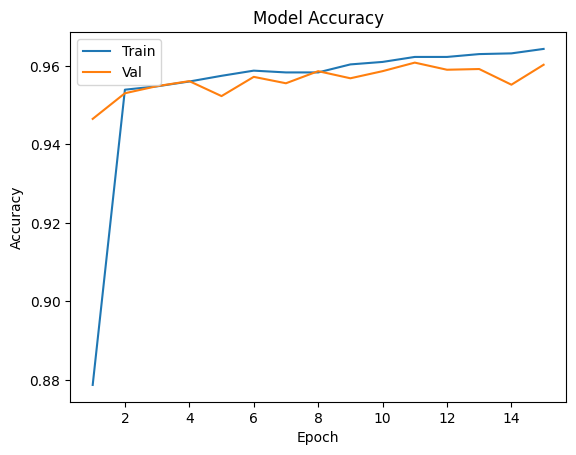

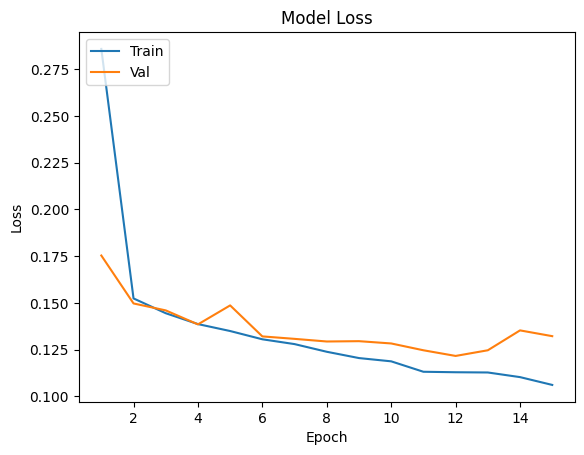

In [51]:
plot_learningCurve(history, 15)